#  Data Analysis and Visualizations

## Exploratory Data Analysis (EDA)

Goals:
1. Insight into data - patterns, outliers, anamolies
2. Underlying data structure (variables, etc.)
3. Underlying assumptions (variable relationships, trends)
4. Preparing data for data modeling and simulation (for applying predictive and other analytics)

In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

### Loading CSV File

We will be using ICU data as an example for exploratory anlaysis.

For this purpose, we are using two files located at /opt/class/numpy/icu_data.csv

The icu_data.csv has text header.

In [4]:
icu_df = pd.read_csv("/opt/class/numpy/icu_data.csv")
print(icu_df.head(5))

   RecordID  SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death
0    132539       6     1               5        -1                  0
1    132540      16     8               8        -1                  0
2    132541      21    11              19        -1                  0
3    132543       7     1               9       575                  0
4    132545      17     2               4       918                  0


##### What are the variables present in the data?

1. Record ID
2. SAPS-I score
3. SOFA score
4. Length of Stay (days from ICU admission to end of hospitalization)
5. Survival (number of days after ICU admission)
6. In-hospital death

##### Data Constrainst
Only patients who stayed for more than 48 hours (2 days) are included.

##### Assumptions

1. SAPS-I score and SOFA score directly related to length of stay and survival. Higher the score, longer is the survival, lesser is chance of death and lesser is length of stay.
2. Survival cannot be 0 or 1, it should always be 2 or more.
3. If In-hospital death - patient died in hospital, then 2 <= Survival <= Length of stay
4. If patient did not die or no data, Survival = -1
5. If Survival > Length of Stay = patient died outside hospital (survivor)

### Distribution Analysis
We will develop histograms to see distribution of SAPS-I, SOFA score, Length of Stay and Survival. We will use bar graphs to see distribution of In-hospital death.

Make Boxplot for SAPS-I, SOFA, Length of Stay, Survival.

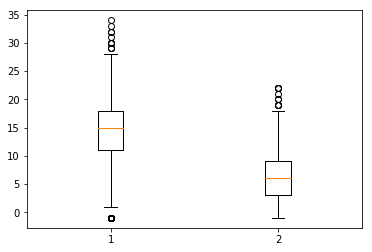

In [68]:
data = [icu_df["SAPS-I"], icu_df["SOFA"]]
plt.figure()
plt.boxplot(data)
plt.show()

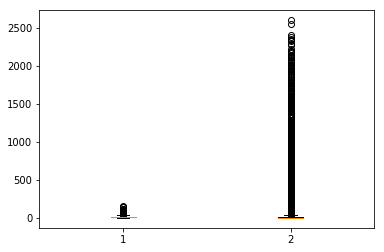

In [69]:
data = [icu_df["Length_of_stay"], icu_df["Survival"]]
plt.figure()
plt.boxplot(data)
plt.show()

Make Histogram for Survial and SOFA

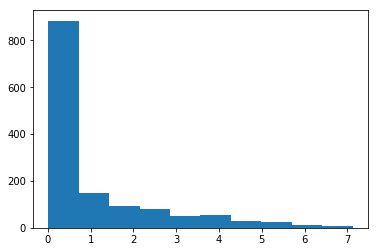

In [70]:
df1 = icu_df.loc[icu_df["Survival"] > 2]
plt.figure()
plt.hist((df1["Survival"]/365), bins=10)
plt.show()

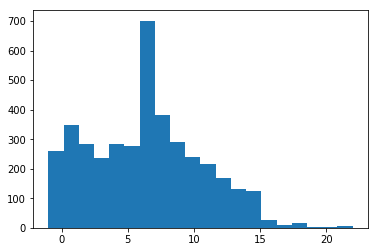

In [71]:
plt.figure()
plt.hist(icu_df["SOFA"], bins=20)
plt.show()

Make a pie chart for in-hospital death:

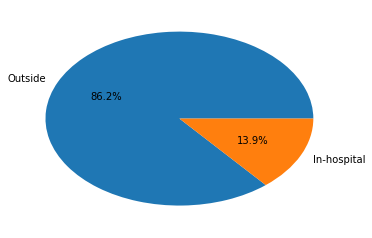

In [72]:
plt.pie(icu_df["In-hospital_death"].value_counts(), labels=["Outside", "In-hospital"], autopct='%1.1f%%')
plt.show()

### Relationship Analysis

What is relationship between SOFA or SAPS-I and Length of Stay?

Make two line graphs: SOFA vs Length of Stay, SPAS-I vs Length of Stay


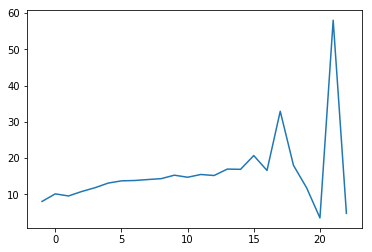

In [73]:
df2 = icu_df.groupby(["SOFA"], as_index=False).mean()
plt.plot(df2["SOFA"],df2["Length_of_stay"])
plt.show()

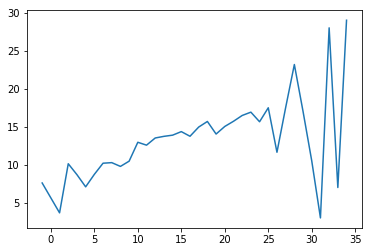

In [74]:
df2 = icu_df.groupby(["SAPS-I"], as_index=False).mean()
plt.plot(df2["SAPS-I"],df2["Length_of_stay"])
plt.show()

#### Both SOFA and SAPS-I in same graph

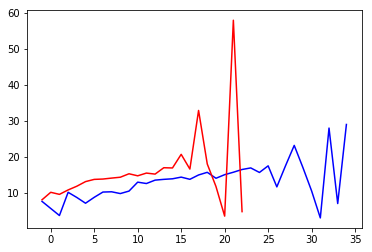

In [75]:
df2 = icu_df.groupby(["SAPS-I"], as_index=False).mean()
df3 = icu_df.groupby(["SOFA"], as_index=False).mean()
plt.plot(df2["SAPS-I"],df2["Length_of_stay"], 'b-', df3["SOFA"],df3["Length_of_stay"], 'r-')
plt.show()

## Inferential Analysis

We will conduct, t-test, chi-square test, and linear regression.

### t-tests

Is there difference in Length of stay between SOFA score less than 15 and SOFA greater than 15?

We create two groups for SOFA_Group and apply ttest (independant sample)


In [10]:
def group_sofa(row):
    if (row["SOFA"] <=15):
        return 1
    else:
        return 2

#icu_df["SOFA_Group"] = icu_df.apply(lambda x: 1 if x["SOFA"] <= 15 else 2, axis=1)
icu_df["SOFA_Group"] = icu_df.apply(group_sofa, axis=1)
icu_df.head()

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,SOFA_Group
0,132539,6,1,5,-1,0,1
1,132540,16,8,8,-1,0,1
2,132541,21,11,19,-1,0,1
3,132543,7,1,9,575,0,1
4,132545,17,2,4,918,0,1


In [77]:
from scipy import stats
statistic, pvalue = stats.ttest_ind(icu_df[icu_df["SOFA_Group"]==1]["Length_of_stay"], icu_df[icu_df["SOFA_Group"]==2]["Length_of_stay"])
print(statistic, pvalue)

-3.43880296374 0.000590263388104


### Chi-Square Contingency Test

Here we will have 4 group. SOFA_Group (1, 2), In-hospital_death (Yes, No)
       Col 1   Col2 (Death)
       Yes     No
Row 1
Row 2

Our final arrays should be [R1C1, R1C2],[R2C1, R2C2]

Create 4 data series and apply chi-square test

In [78]:
df1 = icu_df[icu_df["SOFA_Group"]==1]["In-hospital_death"].value_counts()
df2 = icu_df[icu_df["SOFA_Group"]==2]["In-hospital_death"].value_counts()
chi2, p, dof, ex = stats.chi2_contingency([df1,df2])
print(chi2, p, dof, ex)

23.791254392 1.07369201413e-06 1 [[ 3410.42625   526.57375]
 [   54.57375     8.42625]]


### Linear Regression

Lets do a linear regression to predict Length of Stay.
Outcome variable is Length of stay, Input variable = SAPS and SOFA (2 different tests)


r-squared: 0.0347318500871
p-value: 1.3771002881e-32


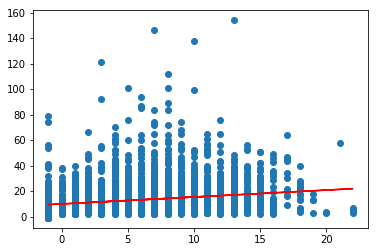

In [79]:
x = icu_df["SOFA"]
y = icu_df["Length_of_stay"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)
print("p-value:", p_value)
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r')
plt.show()

r-squared: 0.0335293977786
p-value: 1.68776323425e-31


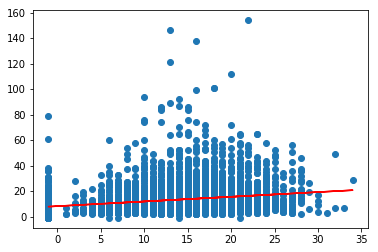

In [80]:
x = icu_df["SAPS-I"]
y = icu_df["Length_of_stay"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)
print("p-value:", p_value)
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r')
plt.show()

## End of Session